# Exploratory Data Analysis

Geographic location of the bus stops in Ciudad Autonoma de Buenos Aires, with some extra administrative information like commune/comuna and the associated bus lines in each stop. Geographic reference of city streets, including their directionality, in GeoJSON format.

I will be using the `geopandas` library.

### Source
For more info about all the dataset and their columns visit the links:


- **Dataset:** Paradas de Colectivo (GeoJSON)

    - **Link:** [Buenos Aires Data - Paradas de Colectivo][bus_stops]

- **Dataset:** Callejero (GeoJSON)

    - **Link:** [Buenos Aires Data - Callejero][callejero]

- **Dataset:** Comunas (GeoJSON)

    - **Link:** [Buenos Aires Data - Comunas][comunas]

- **Dataset** Barrios (GeoJSON)
    - **Link:** [Buenos Aires Data - Barios][barrios]

[bus_stops]: https://data.buenosaires.gob.ar/dataset/colectivos-paradas/resource/e9699a48-7189-499f-ab3b-d164fd7a1730
[callejero]: https://data.buenosaires.gob.ar/dataset/calles/resource/juqdkmgo-301-resource
[comunas]: https://data.buenosaires.gob.ar/dataset/comunas/resource/b0b627ac-5b47-4574-89ac-6999b63598ee
[barrios]: https://data.buenosaires.gob.ar/dataset/barrios/resource/1c3d185b-fdc9-474b-b41b-9bd960a3806e

## Questions:

To complete:
* abc
* def
* ghi

## Setup

#### Imports

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from shapely.geometry import Point
from pathlib import Path

#### Initial settings

In [2]:
%matplotlib inline
sys.path.append(str(Path.cwd().parent / "src"))

## Loading Data

In [3]:
PROJECT_ROOT = Path.cwd().parent 
DATA_PATH = PROJECT_ROOT / "data" / "raw" 

DATA_PATH.exists()

True

In [4]:
stops_raw = gpd.read_file(DATA_PATH / "paradas-de-colectivo.geojson")

# Make a copy in order to leave the original file intact
stops = stops_raw.copy()
stops[["DIRECCION", "COMUNA", "BARRIO", "L1", "l1_sen", "L2", "geometry"]].head(7)

,DIRECCION,COMUNA,BARRIO,L1,l1_sen,L2,geometry
0,1524 DEFENSA,1,SAN TELMO,22,V,53,POINT (-58.37099 -34.62566)
1,1528 DEFENSA,1,SAN TELMO,29,I,None,POINT (-58.371 -34.62571)
2,"906 MITRE, BARTOLOME",1,SAN NICOLAS,105,V,None,POINT (-58.37966 -34.60722)
3,51 REGIMIENTO DE PATRICIOS AV.,4,BARRACAS,93,I,70,POINT (-58.37066 -34.63023)
4,389 REGIMIENTO DE PATRICIOS AV.,4,BARRACAS,10,I,22,POINT (-58.37036 -34.63341)
5,435 REGIMIENTO DE PATRICIOS AV.,4,BARRACAS,24,i,46,POINT (-58.37028 -34.63401)
6,471 REGIMIENTO DE PATRICIOS AV.,4,BARRACAS,39,V,93,POINT (-58.37023 -34.6343)


In [5]:
streets_raw = gpd.read_file(DATA_PATH / "callejero.geojson")
streets = streets_raw.copy()
streets[["nomoficial", "alt_izqini", "alt_izqfin", "comuna", "barrio", "geometry"]].head(7)

,nomoficial,alt_izqini,alt_izqfin,comuna,barrio,geometry
0,"CANTILO, INT.",0,0,13.0,Nuñez,"LINESTRING (-58.46219 -34.53452, -58.46267 -34..."
1,"LUGONES, LEOPOLDO AV.",0,0,13.0,Nuñez,"LINESTRING (-58.46515 -34.53465, -58.46496 -34..."
2,"PAZ, GRAL. AV.",2,300,13.0,Nuñez,"LINESTRING (-58.46561 -34.53507, -58.46577 -34..."
3,DEL LIBERTADOR AV.,0,0,13.0,Nuñez,"LINESTRING (-58.46676 -34.53593, -58.46681 -34..."
4,"COLECTORA CANTILO, INT.",0,0,13.0,Nuñez,"LINESTRING (-58.46065 -34.53512, -58.4608 -34...."
5,LA CACHILA,8602,8700,13.0,Nuñez,"LINESTRING (-58.46503 -34.53603, -58.46561 -34..."
6,VEDIA,1602,1620,13.0,Nuñez,"LINESTRING (-58.46681 -34.53584, -58.46721 -34..."


In [6]:
comunas_raw = gpd.read_file(DATA_PATH / "comunas.geojson")
comunas = comunas_raw.copy()
comunas.head(7)

,id,objeto,comuna,barrios,perimetro,area,geometry
0,1,COMUNA,1,"Constitucion, San Telmo, Monserrat, Retiro, Pu...",36351.19,17801036.28,"MULTIPOLYGON (((-58.34892 -34.61698, -58.34901..."
1,2,COMUNA,2,Recoleta,25965.02,6433391.77,"POLYGON ((-58.38039 -34.56847, -58.38037 -34.5..."
2,3,COMUNA,3,"San Cristobal, Balvanera",10486.26,6385992.08,"POLYGON ((-58.41192 -34.59801, -58.4103 -34.59..."
3,4,COMUNA,4,"Barracas, La Boca, Parque Patricios, Nueva Pom...",35481.84,21690646.89,"POLYGON ((-58.35521 -34.61944, -58.35515 -34.6..."
4,5,COMUNA,5,"Almagro, Boedo",12323.43,6660603.77,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."
5,6,COMUNA,6,Caballito,10990.96,6851029.56,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
6,7,COMUNA,7,"Flores, Parque Chacabuco",17972.26,12422902.00,"POLYGON ((-58.452 -34.62975, -58.45158 -34.630..."


In [7]:
barrios_raw = gpd.read_file(DATA_PATH / "barrios.geojson")
barrios = barrios_raw.copy()
barrios.head(7)

,id,objeto,nombre,comuna,perimetro_,area_metro,geometry
0,1,BARRIO,Agronomia,15,6556.17,2122169.54,"POLYGON ((-58.47589 -34.59173, -58.47598 -34.5..."
1,2,BARRIO,Almagro,5,8537.90,4050752.63,"POLYGON ((-58.416 -34.59786, -58.4157 -34.5978..."
2,3,BARRIO,Balvanera,3,8375.82,4342280.68,"POLYGON ((-58.39294 -34.59964, -58.39277 -34.6..."
3,4,BARRIO,Barracas,4,12846.58,7955144.83,"POLYGON ((-58.37066 -34.6295, -58.37064 -34.62..."
4,5,BARRIO,Belgrano,13,20430.59,8060009.10,"POLYGON ((-58.45167 -34.53565, -58.45168 -34.5..."
5,6,BARRIO,La Boca,4,20029.29,5037482.05,"POLYGON ((-58.35147 -34.61936, -58.35144 -34.6..."
6,7,BARRIO,Boedo,5,6602.51,2609851.12,"POLYGON ((-58.41178 -34.63036, -58.41178 -34.6..."


## Preprocessing

### Columns

I will normalize the column names: lowercase + snake_case

In [8]:
stops.columns


Index(['fid', 'CALLE', 'ALT PLANO', 'DIRECCION', 'coord_X', 'coord_Y',
       'COMUNA', 'BARRIO', 'L1', 'l1_sen', 'L2', 'l2_sen', 'L3', 'l3_sen',
       'L4', 'l4_sen', 'L5', 'l5_sen', 'L6', 'l6_sen', 'geometry'],
      dtype='object')

In [9]:
streets.columns

Index(['id', 'codigo', 'nomoficial', 'alt_izqini', 'alt_izqfin', 'alt_derini',
       'alt_derfin', 'nomanter', 'nom_mapa', 'tipo_c', 'long', 'sentido',
       'observa', 'bicisenda', 'red_jerarq', 'tipo_ffcc', 'comuna', 'com_par',
       'com_impar', 'barrio', 'barrio_par', 'barrio_imp', 'geometry'],
      dtype='object')

In [10]:
comunas.columns

Index(['id', 'objeto', 'comuna', 'barrios', 'perimetro', 'area', 'geometry'], dtype='object')

In [11]:
barrios.columns

Index(['id', 'objeto', 'nombre', 'comuna', 'perimetro_', 'area_metro',
       'geometry'],
      dtype='object')

In [12]:
from normalize_columns import normalize_columns

datasets = [stops, streets, comunas, barrios]

for ds in datasets:
    ds.columns = normalize_columns(ds.columns)


In [13]:
stops.columns

Index(['fid', 'calle', 'alt_plano', 'direccion', 'coord_x', 'coord_y',
       'comuna', 'barrio', 'l1', 'l1_sen', 'l2', 'l2_sen', 'l3', 'l3_sen',
       'l4', 'l4_sen', 'l5', 'l5_sen', 'l6', 'l6_sen', 'geometry'],
      dtype='object')

In [14]:
# I will also rename the column nomoficial in streets for nom_oficial
streets.rename(columns={"nomoficial": "nom_oficial"}, inplace=True)
streets.columns


Index(['id', 'codigo', 'nom_oficial', 'alt_izqini', 'alt_izqfin', 'alt_derini',
       'alt_derfin', 'nomanter', 'nom_mapa', 'tipo_c', 'long', 'sentido',
       'observa', 'bicisenda', 'red_jerarq', 'tipo_ffcc', 'comuna', 'com_par',
       'com_impar', 'barrio', 'barrio_par', 'barrio_imp', 'geometry'],
      dtype='object')

In [15]:
comunas.columns

Index(['id', 'objeto', 'comuna', 'barrios', 'perimetro', 'area', 'geometry'], dtype='object')

In [16]:
barrios.columns

Index(['id', 'objeto', 'nombre', 'comuna', 'perimetro', 'area_metro',
       'geometry'],
      dtype='object')

### Dtypes

Let's check some relevant dtypes of the stops DataFrame:

In [17]:
stops[["comuna","l1","l2","l3","l4","l5","l6","geometry"]].dtypes

comuna        object
l1            object
l2            object
l3            object
l4            object
l5            object
l6            object
geometry    geometry
dtype: object

#### **l1-l6** and **comuna** to integers

Now I will convert the columns **l1-l6** and **comuna** to int type (bus lines and commune numbers are integers):

In [18]:
cols_to_convert = ["comuna","l1", "l2", "l3", "l4", "l5", "l6"]
for col in cols_to_convert:
    stops[col] = pd.to_numeric(stops[col], errors="coerce").astype('Int64')

stops[cols_to_convert].dtypes

comuna    Int64
l1        Int64
l2        Int64
l3        Int64
l4        Int64
l5        Int64
l6        Int64
dtype: object

### New column **n_lines**

I will create a column **n_lines** as the number of non-null line fields (**l1-l6**) per stop

In [19]:
line_cols = ["l1", "l2", "l3", "l4", "l5", "l6"]
stops["n_lines"] = stops[line_cols].notna().sum(axis=1)
stops[["direccion","n_lines"]].head()

,direccion,n_lines
0,1524 DEFENSA,2
1,1528 DEFENSA,1
2,"906 MITRE, BARTOLOME",1
3,51 REGIMIENTO DE PATRICIOS AV.,3
4,389 REGIMIENTO DE PATRICIOS AV.,2


Let's check some relevant dtypes of the streets DataFrame:

In [20]:
streets[["alt_izqini","alt_izqfin",
         "alt_derini","alt_derfin",
         "comuna","com_par","com_impar"]].dtypes

alt_izqini      int32
alt_izqfin      int32
alt_derini      int32
alt_derfin      int32
comuna        float64
com_par       float64
com_impar     float64
dtype: object

### **comuna**, **com_par**, **com_impar** to integers

Let's convert the columns with the associated commune/comuna to integers: 

In [21]:
cols_to_convert = ["comuna", "com_par", "com_impar"]
for col in cols_to_convert:
    streets[col] = pd.to_numeric(streets[col], errors="coerce").astype('Int64')

streets[cols_to_convert].dtypes

comuna       Int64
com_par      Int64
com_impar    Int64
dtype: object

Let's check the dtypes of the comunas DataFrame:

In [22]:
comunas.dtypes

id              int32
objeto         object
comuna          int32
barrios        object
perimetro     float64
area          float64
geometry     geometry
dtype: object

Let's check the dtypes of the barrios DataFrame:

In [33]:
barrios.dtypes

id               int32
objeto          object
nombre          object
comuna           int32
perimetro      float64
area_metro     float64
geometry      geometry
dtype: object

### Check Coordinate Reference System (CRS)

The CRS (Coordinate Reference System) defines how numerical coordinates are mapped to positions on the Earth's surface. It is important to verify that all GeoDataFrames share the same CRS before performing spatial operations.



In [40]:
for ds in datasets:
    print(ds.crs)

EPSG:4326
EPSG:4326
EPSG:4326
EPSG:4326


### Encoding/Text issue

While exploring the **paradas-de-colectivo** GeoJSON file, I noticed that some characters (e.g., `Ñ`, accented vowels) appear corrupted in the fields **calle**, **direccion**, and **barrio** (e.g., `NU�EZ` instead of `NUÑEZ`).

This � symbol is the Unicode *replacement character* (U+FFFD). There are also some values that have `?` instead of �.

In the next cells, I quantify how many rows are affected and list the most frequent corrupted values.

In [23]:
cols_to_check = ["calle", "direccion", "barrio"]
replacement_char = "\ufffd"

# Let's see how many rows are affected per column:
for col in cols_to_check:
    n_repl_char = stops[col].str.contains(replacement_char, na=False).sum()
    n_ques_char = stops[col].str.contains("?", na=False, regex=False).sum()
    print(f"{col}: {n_repl_char} rows contain '{replacement_char}'")
    print(f"{col}: {n_ques_char} rows contain '?'")

calle: 163 rows contain '�'
calle: 0 rows contain '?'
direccion: 116 rows contain '�'
direccion: 49 rows contain '?'
barrio: 74 rows contain '�'
barrio: 0 rows contain '?'


In [24]:
# Let's see what are the corrupted values per column and count them:
for col in cols_to_check:
    corrupted_vals = stops.loc[
        (stops[col].str.contains(replacement_char, na=False)) 
        |
        (stops[col].str.contains("?", na=False, regex=False)),
        col]
    print(f"The most corrupted values in {col} are:")
    display(corrupted_vals.value_counts().head())

The most corrupted values in calle are:


calle
CASTA�ARES AV.                    23
ALEJANDRO MARGARI�OS CERVANTES    21
RODRIGUEZ PE�A                    17
PRES. LUIS SAENZ PE�A             14
NU�EZ                             14
Name: count, dtype: int64

The most corrupted values in direccion are:


direccion
CALLE INTERNA, PABELL�N 1, C.U.    3
CALLE INTERNA, PABELL�N 3, C.U.    2
CALLE INTERNA, PABELL�N 2, C.U.    2
24 RODRIGUEZ PE�A                  1
240 RODRIGUEZ PE�A                 1
Name: count, dtype: int64

The most corrupted values in barrio are:


barrio
NU�EZ    74
Name: count, dtype: int64

I will use another official public dataset of Buenos Aires, this dataset provides the official names and spatial geometries for all streets in the city. By matching each bus stop's coordinates to the corresponding street geometry, I can correct corrupted or misspelled street names. Check the link for more info:

**Link:** [Buenos Aires Data - Callejero][callejero]

[callejero]: https://data.buenosaires.gob.ar/dataset/calles/resource/juqdkmgo-301-resource

In [25]:
# Let's check that everything it's ok:
for col in cols_to_check:
    n_repl_char = stops[col].str.contains(replacement_char, na=False).sum()
    n_ques_char = stops[col].str.contains("?", na=False, regex=False).sum()
    print(f"{col}: {n_repl_char} rows contain '{replacement_char}'")
    print(f"{col}: {n_ques_char} rows contain '?'")

calle: 163 rows contain '�'
calle: 0 rows contain '?'
direccion: 116 rows contain '�'
direccion: 49 rows contain '?'
barrio: 74 rows contain '�'
barrio: 0 rows contain '?'


## Descriptive analysis

In [26]:
stops

,fid,calle,alt_plano,direccion,coord_x,coord_y,comuna,barrio,l1,l1_sen,...,l3,l3_sen,l4,l4_sen,l5,l5_sen,l6,l6_sen,geometry,n_lines
0,1,DEFENSA,1524,1524 DEFENSA,"-58,3709946","-34,62565880",1,SAN TELMO,22,V,...,<NA>,None,<NA>,None,<NA>,None,<NA>,None,POINT (-58.37099 -34.62566),2
1,2,DEFENSA,1528,1528 DEFENSA,"-58,3709994","-34,62571060",1,SAN TELMO,29,I,...,<NA>,None,<NA>,None,<NA>,None,<NA>,None,POINT (-58.371 -34.62571),1
2,3,BARTOLOME MITRE,906,"906 MITRE, BARTOLOME","-58,3796587","-34,60721560",1,SAN NICOLAS,105,V,...,<NA>,None,<NA>,None,<NA>,None,<NA>,None,POINT (-58.37966 -34.60722),1
3,4,REGIMIENTO DE PATRICIOS AV.,51,51 REGIMIENTO DE PATRICIOS AV.,"-58,3706639","-34,63022580",4,BARRACAS,93,I,...,74,I,<NA>,None,<NA>,None,<NA>,None,POINT (-58.37066 -34.63023),3
4,5,REGIMIENTO DE PATRICIOS AV.,389,389 REGIMIENTO DE PATRICIOS AV.,"-58,3703604","-34,63340970",4,BARRACAS,10,I,...,<NA>,None,<NA>,None,<NA>,None,<NA>,None,POINT (-58.37036 -34.63341),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,6958,NAZCA AV.,1672,1672 NAZCA AV.,"-58,479063","-34,61479700",11,VILLA SANTA RITA,63,I,...,<NA>,None,<NA>,None,<NA>,None,<NA>,None,POINT (-58.47906 -34.6148),2
6958,6959,BAIGORRIA,4185,4185 BAIGORRIA,"-58,50318","-34,61053300",11,VILLA DEVOTO,109,V,...,<NA>,None,<NA>,None,<NA>,None,<NA>,None,POINT (-58.50318 -34.61053),1
6959,6960,GRAL. PAZ AV.,11118,"PAZ, GRAL. AV. 11118","-58,528564","-34,64514700",9,LINIERS,4,I,...,<NA>,None,<NA>,None,<NA>,None,<NA>,None,POINT (-58.52856 -34.64515),2
6960,6961,GRAL. PAZ AV.,11108,"PAZ, GRAL. AV. 11108","-58,528629","-34,64461600",9,LINIERS,8,V,...,<NA>,None,<NA>,None,<NA>,None,<NA>,None,POINT (-58.52863 -34.64462),2


### Dataset dimensions

In [27]:
stops.shape

(6962, 22)

### General information about the dataset

In [28]:
stops.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   fid        6962 non-null   int32   
 1   calle      6962 non-null   object  
 2   alt_plano  6910 non-null   object  
 3   direccion  6959 non-null   object  
 4   coord_x    6962 non-null   object  
 5   coord_y    6962 non-null   object  
 6   comuna     6962 non-null   Int64   
 7   barrio     6961 non-null   object  
 8   l1         6959 non-null   Int64   
 9   l1_sen     6957 non-null   object  
 10  l2         3813 non-null   Int64   
 11  l2_sen     3806 non-null   object  
 12  l3         586 non-null    Int64   
 13  l3_sen     586 non-null    object  
 14  l4         98 non-null     Int64   
 15  l4_sen     94 non-null     object  
 16  l5         19 non-null     Int64   
 17  l5_sen     19 non-null     object  
 18  l6         8 non-null      Int64   
 19  l6_sen     8 non-nu

Let's see the information about the neighborhoods (barrios) that there are in the dataset:

In [29]:
print("Unique barrios (droping null values):", stops["barrio"].nunique(dropna=True))
print("Null barrios:", stops["barrio"].isna().sum())

Unique barrios (droping null values): 49
Null barrios: 1


CRS: EPSG:4326
total_bounds antes: [-5.83445535e+08 -3.47006587e+01 -5.83423400e+01 -3.45364800e+01]
filas con geometría inválida: 1


,fid,calle,alt_plano,direccion,coord_x,coord_y,comuna,barrio,l1,l1_sen,...,l3,l3_sen,l4,l4_sen,l5,l5_sen,l6,l6_sen,geometry,n_lines
4411,4412,ASAMBLEA AV.,1493,1493 ASAMBLEA AV.,-583445535,"-34,63657000",7,PARQUE CHACABUCO,4,V,...,<NA>,None,<NA>,None,<NA>,None,<NA>,None,POINT (-583445535 -34.63657),1


total_bounds después: [-58.5304892 -34.7006587 -58.34234   -34.53648  ]


Text(0.5, 1.0, 'Bus stops (filtradas)')

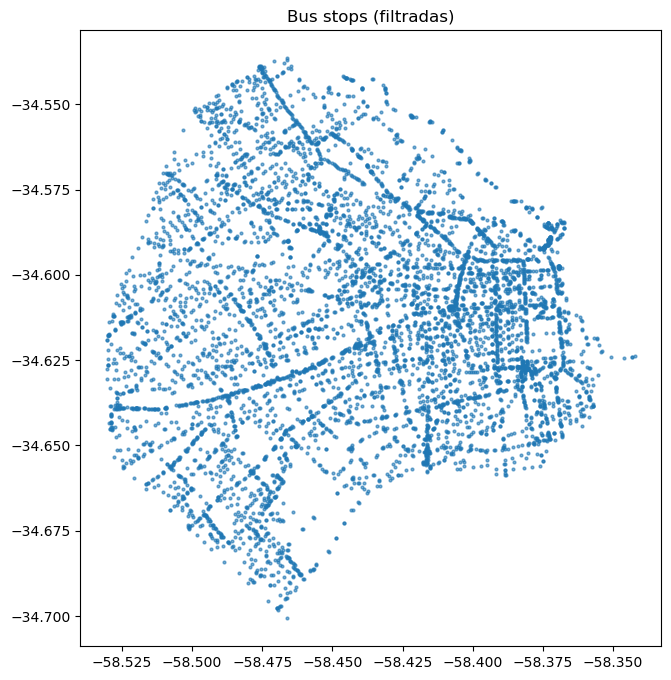

In [30]:
# detectar outliers
print("CRS:", stops.crs)
print("total_bounds antes:", stops.total_bounds)
invalid = ~stops.geometry.x.between(-180, 180) | ~stops.geometry.y.between(-90, 90)
print("filas con geometría inválida:", invalid.sum())
display(stops[invalid].head())

# filtrar (eliminar outliers)
stops_clean = stops.loc[~invalid].copy()
print("total_bounds después:", stops_clean.total_bounds)

# plotear con tamaño y transparencia para ver puntos
ax = stops_clean.plot(figsize=(8,8), markersize=4, alpha=0.6)
ax.set_title("Bus stops (filtradas)")

<Axes: >

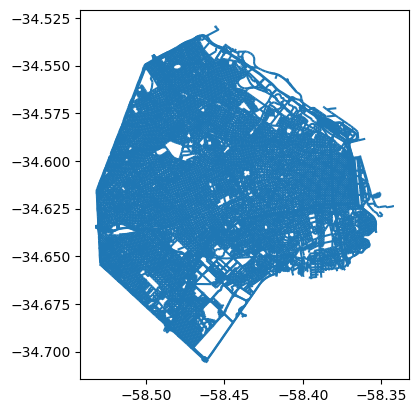

In [31]:
streets.plot()

<Axes: >

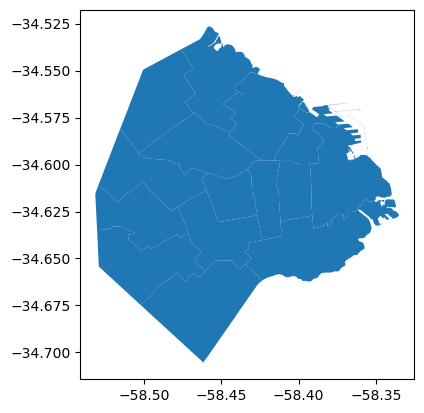

In [32]:
comunas.plot()